## Does obesity and age have an affect on Covid with Breast Cancer!!!

This Python script analyzes the correlation and impact of age, obesity, and breast cancer status on the severity of COVID-19 outcomes. The data used for analysis includes information about individuals with breast cancer, their age, obesity status, and COVID-19 severity levels.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#raw_data.to_csv('dataset')
rawdata_df=pd.read_csv('dataset')
rawdata_df


,Unnamed: 0,der_ordinal_v1a,der_days_fu,der_deadbinary,der_dead30,der_mv,der_ICU,der_hosp,der_AKI_comp,der_MOF_comp,...,der_txline,der_heme,der_metastatic,der_met_bone,der_met_liver,der_met_lung_v2,der_age_trunc,der_CV_event_v2,der_pulm_event,der_GI_event
0,0,0,30.0,No,No,No,No,No,No,No,...,First line,0,Missing/Unknown,NaN,NaN,NaN,58.0,No,Yes,No
1,1,0,180.0,No,No,No,No,No,No,No,...,Non-curative NOS,0,Yes,Yes,No,No,67.0,No,No,No
2,2,1,10.5,No,No,No,No,Yes,No,No,...,First line,0,No,No,No,No,42.0,No,No,No
3,3,1,180.0,No,No,No,No,Yes,No,No,...,Untreated in last 12 months,0,Yes,Yes,Yes,No,49.0,No,Yes,No
4,4,0,180.0,No,No,No,No,No,No,No,...,First line,0,No,No,No,No,47.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,1378,0,180.0,No,No,No,No,No,No,No,...,First line,0,No,No,No,No,58.0,No,No,No
1379,1379,1,30.0,No,No,No,No,Yes,Yes,No,...,Curative NOS,0,Yes,No,No,No,73.0,No,No,No
1380,1380,0,135.0,No,No,No,No,No,No,No,...,Untreated in last 12 months,0,No,No,No,No,60.0,No,No,No
1381,1381,1,10.5,No,No,No,No,Yes,No,No,...,Untreated in last 12 months,0,No,No,No,No,60.0,No,Yes,No


In [2]:
rawdata_df.columns

Index(['Unnamed: 0', 'der_ordinal_v1a', 'der_days_fu', 'der_deadbinary',
       'der_dead30', 'der_mv', 'der_ICU', 'der_hosp', 'der_AKI_comp',
       'der_MOF_comp', 'der_coinfection_any', 'der_sepsis_comp',
       'der_bleeding_comp', 'der_rem', 'der_hcq', 'der_steroids_c19',
       'der_other_tx_c19_v2', 'der_o2_ever', 'der_race_v2', 'der_insurance',
       'der_smoking2', 'der_obesity', 'der_card', 'der_pulm', 'der_renal',
       'der_dm2', 'der_ecogcat2', 'der_breast_biomarkers',
       'der_cancer_status_v4', 'der_cancer_tx_timing_v2', 'der_cancertr_none',
       'der_any_cyto', 'der_any_targeted', 'der_her2_3m', 'der_cdk46i_3m',
       'der_other_3m', 'der_any_endo', 'der_any_immuno', 'der_any_local',
       'der_any_other', 'der_region_v2', 'urban_rural', 'der_site_type',
       'severity_of_covid_19_v2', 'der_tr_intent', 'der_txline', 'der_heme',
       'der_metastatic', 'der_met_bone', 'der_met_liver', 'der_met_lung_v2',
       'der_age_trunc', 'der_CV_event_v2', 'der_pulm_eve

In [3]:
rawdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1383 non-null   int64  
 1   der_ordinal_v1a          1383 non-null   int64  
 2   der_days_fu              1383 non-null   float64
 3   der_deadbinary           1375 non-null   object 
 4   der_dead30               1383 non-null   object 
 5   der_mv                   1381 non-null   object 
 6   der_ICU                  1371 non-null   object 
 7   der_hosp                 1383 non-null   object 
 8   der_AKI_comp             1372 non-null   object 
 9   der_MOF_comp             1371 non-null   object 
 10  der_coinfection_any      1318 non-null   object 
 11  der_sepsis_comp          1372 non-null   object 
 12  der_bleeding_comp        1373 non-null   object 
 13  der_rem                  1322 non-null   object 
 14  der_hcq                 

In [4]:
rawdata_df["der_days_fu"]=pd.to_numeric(rawdata_df["der_days_fu"],errors="coerce")
rawdata_df["der_days_fu"]=pd.to_numeric(rawdata_df["der_age_trunc"],errors="coerce")

In [5]:
all_columns=rawdata_df.columns.tolist()
all_columns

['Unnamed: 0',
 'der_ordinal_v1a',
 'der_days_fu',
 'der_deadbinary',
 'der_dead30',
 'der_mv',
 'der_ICU',
 'der_hosp',
 'der_AKI_comp',
 'der_MOF_comp',
 'der_coinfection_any',
 'der_sepsis_comp',
 'der_bleeding_comp',
 'der_rem',
 'der_hcq',
 'der_steroids_c19',
 'der_other_tx_c19_v2',
 'der_o2_ever',
 'der_race_v2',
 'der_insurance',
 'der_smoking2',
 'der_obesity',
 'der_card',
 'der_pulm',
 'der_renal',
 'der_dm2',
 'der_ecogcat2',
 'der_breast_biomarkers',
 'der_cancer_status_v4',
 'der_cancer_tx_timing_v2',
 'der_cancertr_none',
 'der_any_cyto',
 'der_any_targeted',
 'der_her2_3m',
 'der_cdk46i_3m',
 'der_other_3m',
 'der_any_endo',
 'der_any_immuno',
 'der_any_local',
 'der_any_other',
 'der_region_v2',
 'urban_rural',
 'der_site_type',
 'severity_of_covid_19_v2',
 'der_tr_intent',
 'der_txline',
 'der_heme',
 'der_metastatic',
 'der_met_bone',
 'der_met_liver',
 'der_met_lung_v2',
 'der_age_trunc',
 'der_CV_event_v2',
 'der_pulm_event',
 'der_GI_event']

In [6]:
for columns in all_columns:
    print("the unique values in ",columns,"is\n",rawdata_df[columns].value_counts())

the unique values in  Unnamed: 0 is
 Unnamed: 0
0       1
919     1
927     1
926     1
925     1
       ..
460     1
459     1
458     1
457     1
1382    1
Name: count, Length: 1383, dtype: int64
the unique values in  der_ordinal_v1a is
 der_ordinal_v1a
0    866
1    338
4    123
2     31
3     25
Name: count, dtype: int64
the unique values in  der_days_fu is
 der_days_fu
65.0    43
58.0    42
56.0    41
61.0    40
62.0    40
        ..
25.0     2
34.0     2
26.0     1
54.5     1
24.0     1
Name: count, Length: 67, dtype: int64
the unique values in  der_deadbinary is
 der_deadbinary
No     1252
Yes     123
Name: count, dtype: int64
the unique values in  der_dead30 is
 der_dead30
No     1294
Yes      89
Name: count, dtype: int64
the unique values in  der_mv is
 der_mv
No     1312
Yes      69
Name: count, dtype: int64
the unique values in  der_ICU is
 der_ICU
No     1260
Yes     111
Name: count, dtype: int64
the unique values in  der_hosp is
 der_hosp
No     871
Yes    512
Name: count,

In [7]:
categorical_columns = [
    'der_deadbinary', 'der_dead30', 'der_mv', 'der_ICU','der_hosp','der_AKI_comp', 'der_MOF_comp', 'der_coinfection_any',
    'der_sepsis_comp', 'der_bleeding_comp', 'der_rem', 'der_hcq', 'der_steroids_c19', 'der_other_tx_c19_v2',
    'der_o2_ever', 'der_race_v2', 'der_insurance', 'der_smoking2', 'der_obesity', 'der_card', 'der_pulm', 'der_renal',
    'der_dm2', 'der_ecogcat2', 'der_breast_biomarkers', 'der_cancer_status_v4', 'der_cancer_tx_timing_v2',
    'der_cancertr_none', 'der_any_cyto', 'der_any_targeted', 'der_her2_3m', 'der_cdk46i_3m', 'der_other_3m',
    'der_any_endo', 'der_any_immuno', 'der_any_local', 'der_any_other', 'der_region_v2', 'urban_rural', 'der_site_type',
    'severity_of_covid_19_v2', 'der_tr_intent', 'der_txline', 'der_heme', 'der_metastatic', 'der_met_bone',
    'der_met_liver', 'der_met_lung_v2','der_CV_event_v2','der_GI_event','der_pulm_event'
]

# Convert columns to categorical
rawdata_df[categorical_columns] = rawdata_df[categorical_columns].astype('category')

In [8]:
rawdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Unnamed: 0               1383 non-null   int64   
 1   der_ordinal_v1a          1383 non-null   int64   
 2   der_days_fu              1382 non-null   float64 
 3   der_deadbinary           1375 non-null   category
 4   der_dead30               1383 non-null   category
 5   der_mv                   1381 non-null   category
 6   der_ICU                  1371 non-null   category
 7   der_hosp                 1383 non-null   category
 8   der_AKI_comp             1372 non-null   category
 9   der_MOF_comp             1371 non-null   category
 10  der_coinfection_any      1318 non-null   category
 11  der_sepsis_comp          1372 non-null   category
 12  der_bleeding_comp        1373 non-null   category
 13  der_rem                  1322 non-null   category
 14  der_hcq 

In [9]:
# Set the 'Unnamed: 0' column as the index of the DataFrame
rawdata_df.set_index('Unnamed: 0', inplace=True)

In [10]:
selected_columns=["der_age_trunc","der_obesity","der_race_v2","der_cancer_status_v4","severity_of_covid_19_v2"]
selected_columns


['der_age_trunc',
 'der_obesity',
 'der_race_v2',
 'der_cancer_status_v4',
 'severity_of_covid_19_v2']

In [11]:
analysis_df=rawdata_df[selected_columns]
analysis_df

,der_age_trunc,der_obesity,der_race_v2,der_cancer_status_v4,severity_of_covid_19_v2
Unnamed: 0,,,,,
0,58.0,No,Non-Hispanic White,Active and responding,Severe
1,67.0,No,Hispanic,Active and stable,Mild
2,42.0,No,Hispanic,NaN,Moderate
3,49.0,Yes,Other,Unknown,Moderate
4,47.0,No,Hispanic,Active and responding,Mild
...,...,...,...,...,...
1378,58.0,No,Other,Active and responding,Mild
1379,73.0,No,Non-Hispanic Black,Active and responding,Moderate
1380,60.0,Yes,Non-Hispanic White,"Remission or no evidence of disease, >5 years",Mild


#### what age group had a severe covd-19 affect?

The boxplot analysis reveals interesting patterns in the age distribution among individuals with different levels of COVID-19 severity.
For those with mild COVID severity, the majority falls within the age range of 49 to 68. As we move to moderate severity, the age range shifts slightly upwards, spanning from 58 to 79. Interestingly, severe COVID severity shows a similar age range of 57 to 79, but with a somewhat lower starting point compared to the moderate group.
This suggests a trend where

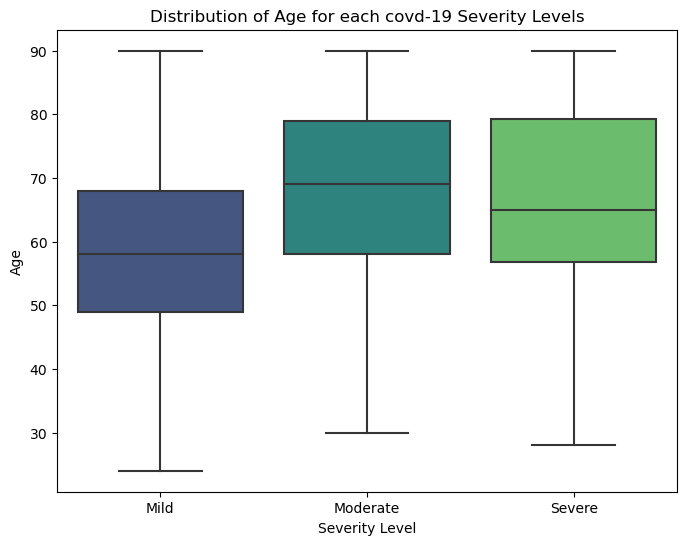

In [12]:
Agecovid_df=analysis_df[["der_age_trunc","severity_of_covid_19_v2"]]
plt.figure(figsize=(8, 6))
sns.boxplot(x="severity_of_covid_19_v2",y="der_age_trunc",data=Agecovid_df,palette="viridis")
plt.title('Distribution of Age for each covd-19 Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Age') 
plt.show()

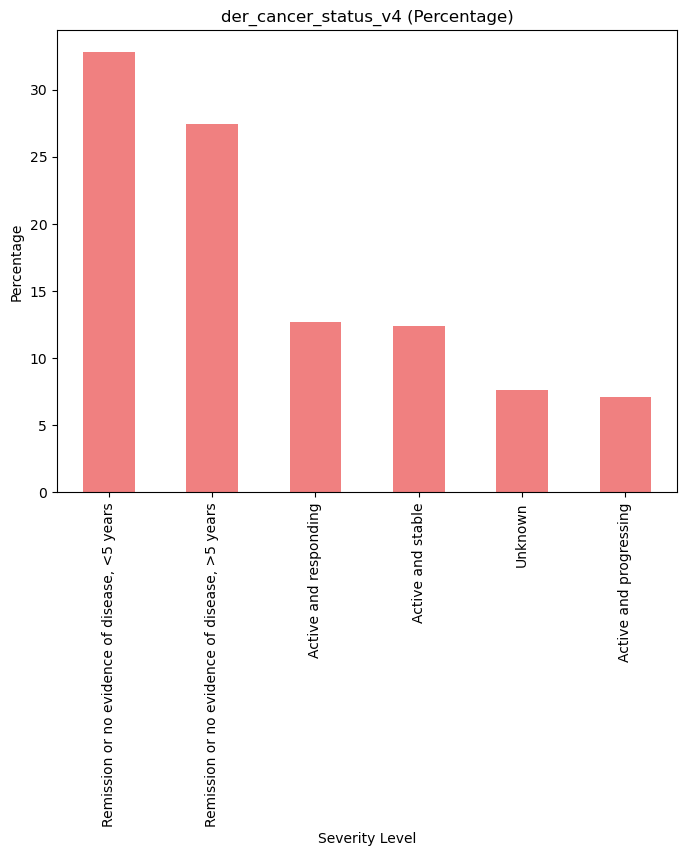

In [13]:
cancer_status_v4_percentages = analysis_df['der_cancer_status_v4'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
cancer_status_v4_percentages.plot(kind='bar', color='lightcoral')
plt.title('der_cancer_status_v4 (Percentage)')
plt.xlabel('Severity Level')
plt.ylabel('Percentage')
plt.show()


der_obesity
No     54.406409
Yes    45.593591
Name: proportion, dtype: float64


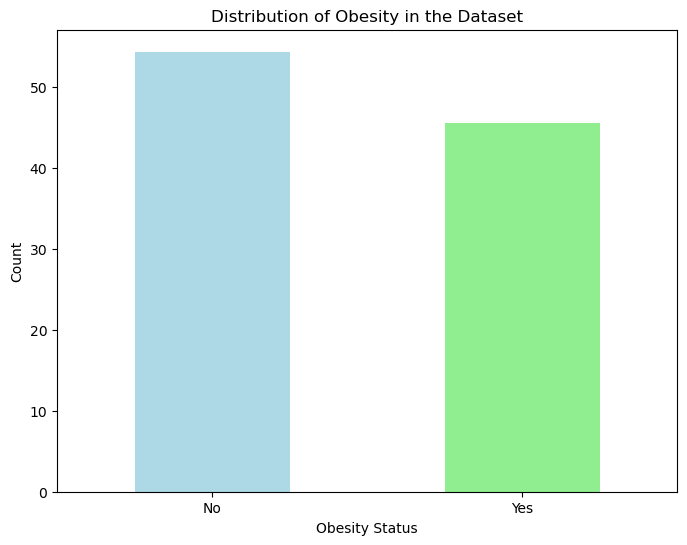

In [14]:
count_df = analysis_df['der_obesity'].value_counts(normalize=True) * 100
print(count_df)
plt.figure(figsize=(8, 6))
count_df.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Distribution of Obesity in the Dataset')
plt.xlabel('Obesity Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


What is the distribution of COVID-19 severity levels among individuals with breast cancer based on obesity status?

This question will help you understand the overall impact of obesity on COVID-19 severity in the breast cancer population.
#What is the Distrution of covid-19 severity level among indiviual of in the data set?

here is the bar that expain the severity level of the covid_19.

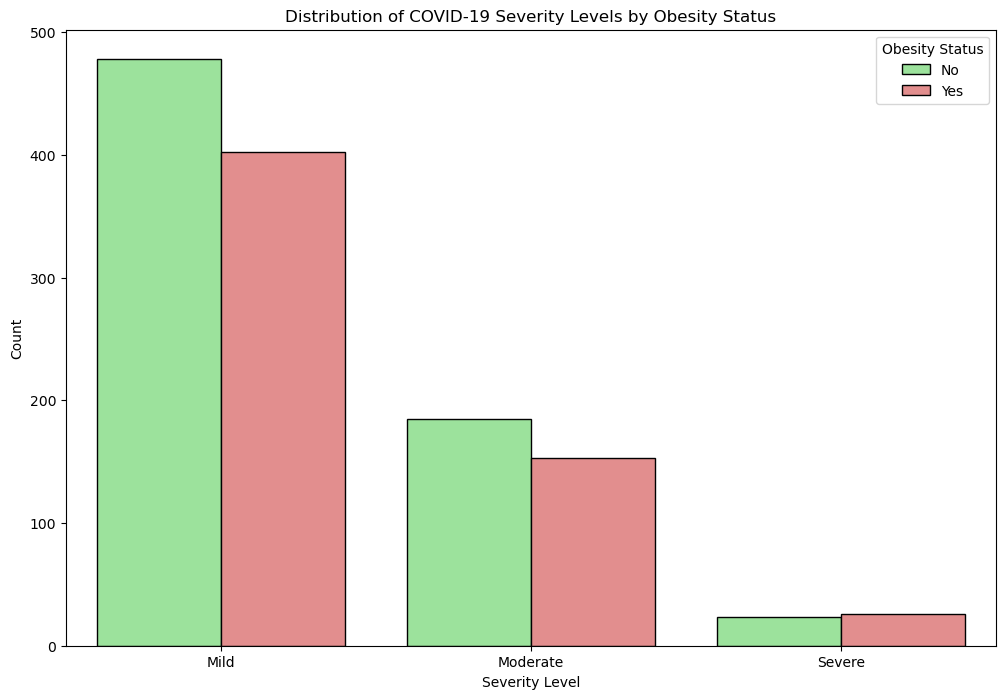

In [15]:
# Create a DataFrame with relevant columns
severity_obesity_df = analysis_df[['severity_of_covid_19_v2', 'der_obesity']]

# Filter out rows with unknown cancer status
severity_obesity_df = severity_obesity_df[analysis_df['der_cancer_status_v4'] != 'Unknown']

colors={"Yes":'lightcoral', "No":'lightgreen'}

# Create a stacked bar chart with hue for obesity status
plt.figure(figsize=(12, 8))
sns.countplot(
    data=severity_obesity_df,
    x='severity_of_covid_19_v2',
    hue='der_obesity',
    palette= colors,  
    edgecolor='black'  # Add black borders for better visibility
)
plt.title('Distribution of COVID-19 Severity Levels by Obesity Status')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.legend(title='Obesity Status')
plt.show()

In [16]:
# Step 1: Filter the Data
filtered_data = analysis_df[analysis_df['der_cancer_status_v4'] == 'Active and responding']

# Step 2: Calculate the Percentage of Obese Individuals
total_active_responding = filtered_data.shape[0]
obese_active_responding = filtered_data[filtered_data['der_obesity'] == 'Yes'].shape[0]

percentage_obese_active_responding = (obese_active_responding / total_active_responding) * 100

# Step 3: Print or Visualize the Result
print(f"Percentage of people with breast cancer who are obese and active and responding: {percentage_obese_active_responding}%")

Percentage of people with breast cancer who are obese and active and responding: 48.554913294797686%


is there any notable differnce in the distribution of obesity among people with breast cancer who are active and responding 
Insight:
From the pie chart, we observe that the distribution of obesity among people with breast cancer who are "Active and Responding" is fairly balanced. Approximately 49.0% are classified as obese (Yes), while the remaining 51.0% are not obese. This suggests that, among individuals actively responding to breast cancer treatment, there is a relatively equal representation of both obese and non-obese individuals.


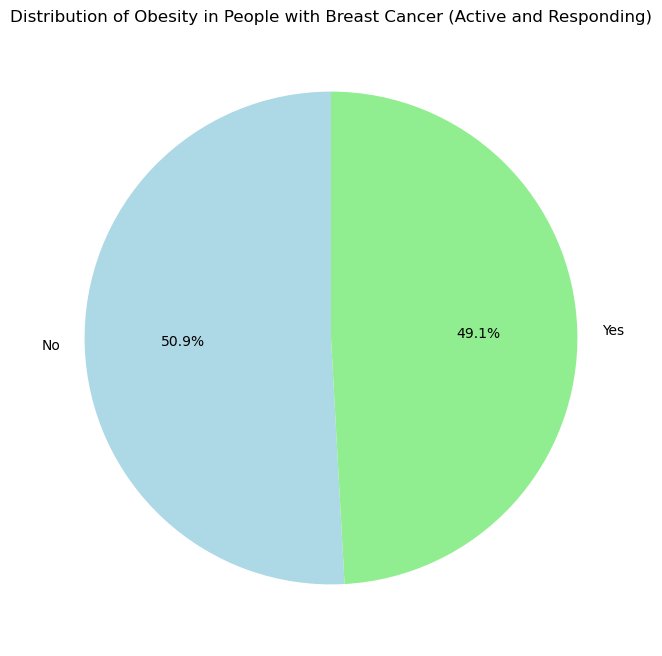

In [17]:
# Create a DataFrame with counts
count_df = filtered_data['der_obesity'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(count_df,labels=count_df.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Obesity in People with Breast Cancer (Active and Responding)')
plt.show()
# Create a DataFrame with counts
count_df = filtered_data['der_obesity'].value_counts()


In [18]:
obese_data= analysis_df[analysis_df["der_obesity"]=="Yes"]
race_count = obese_data["der_race_v2"].value_counts() 
race_count

der_race_v2
Non-Hispanic White    308
Non-Hispanic Black    156
Hispanic              116
Other                  33
Non-Hispanic AAPI      13
Name: count, dtype: int64

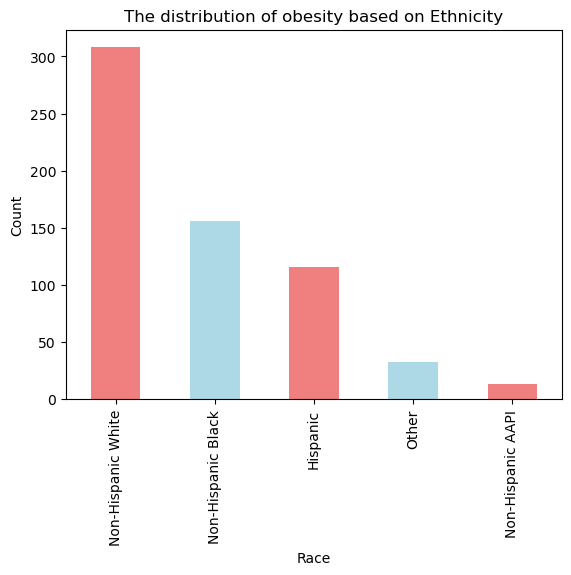

In [19]:
race_count.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title("The distribution of obesity based on Ethnicity")
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()


In [20]:
value_columns=pd.crosstab(analysis_df["der_obesity"],analysis_df["der_cancer_status_v4"])
value_columns

der_cancer_status_v4,Active and progressing,Active and responding,Active and stable,"Remission or no evidence of disease, <5 years","Remission or no evidence of disease, >5 years",Unknown
der_obesity,,,,,,
No,65,87,94,227,202,59
Yes,32,84,73,220,168,45


*Referencing stackoverflow*

In [21]:
from scipy.stats import chi2_contingency
p=chi2_contingency(value_columns)
p

Chi2ContingencyResult(statistic=9.855209201812027, pvalue=0.07944333536226582, dof=5, expected_freq=array([[ 52.50589971,  92.5619469 ,  90.39675516, 241.96017699,
        200.28023599,  56.29498525],
       [ 44.49410029,  78.4380531 ,  76.60324484, 205.03982301,
        169.71976401,  47.70501475]]))

The P-value=0.07944 is above the significance level (0.05).
In statistics, if the P-value is less than 0.05 we can reject the null hypothesis.
If the P-value is greater than 0.05 we fail to reject the hypothesis
Due to the outcome the reason now strong evidence to conclude that there is a correlation between obesity and cancer status.We fail to REJECT.


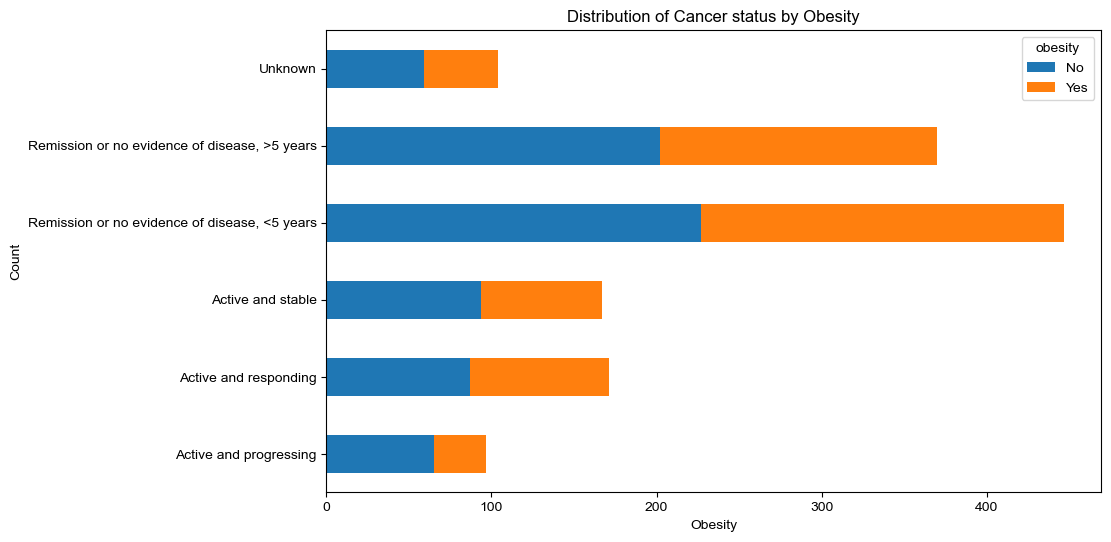

In [22]:
value_columns.T.plot(kind="barh",stacked=True,figsize=(10, 6))
plt.title("Distribution of Cancer status by Obesity")
plt.xlabel("Obesity")
plt.ylabel("Count")
plt.legend(title="obesity")
sns.set(style="whitegrid")
plt.show()

####  How does the age distribution vary among different cancer statuses (der_cancer_status_v4) for individuals with breast cancer?


*Referencing GPT*

/Users/foziayimer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

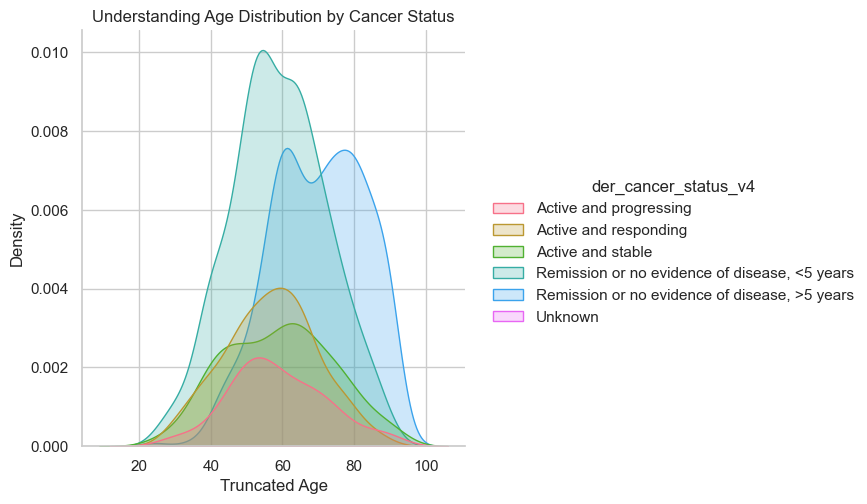

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with relevant columns
age_cancer_df = analysis_df[['der_age_trunc', 'der_cancer_status_v4']]

# Filter out rows with unknown cancer status
age_cancer_df = age_cancer_df[age_cancer_df['der_cancer_status_v4'] != 'Unknown']

# Create a KDE plot with hue for cancer status
plt.figure(figsize=(12, 8))
sns.displot(age_cancer_df, x="der_age_trunc", kind="kde", hue='der_cancer_status_v4', fill=True, palette='husl')
plt.title('Understanding Age Distribution by Cancer Status')
plt.xlabel('Truncated Age')
plt.ylabel('Density')
plt.show()

#### How does the age distribution vary with different COVID-19 severity levels (severity_of_covid_19_v2) for individuals with breast cancer?

Insight:
The KDE plot with hue for COVID severity allows us to visually assess how the age distribution density changes based on different levels of COVID-19 severity. Peaks and variations in the curve provide insights into whether certain age groups are more prone to severe COVID-19 outcomes among individuals with breast cancer. This visualization aids 


*Referencing GPT*

/Users/foziayimer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

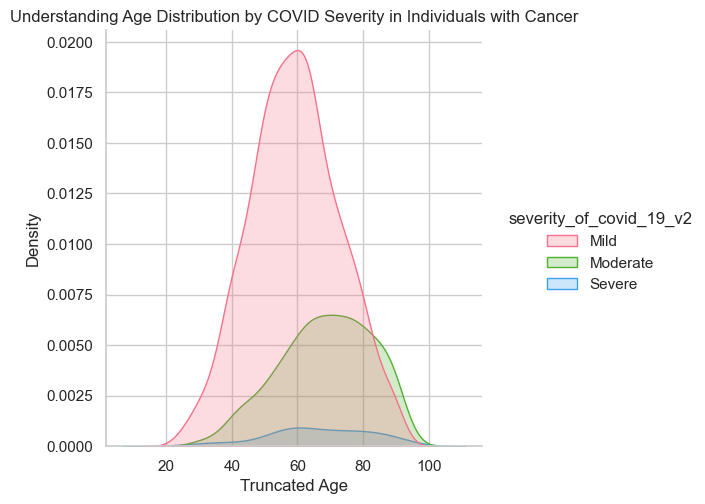

In [26]:
#Create a DataFrame with relevant columns
age_covid_df = analysis_df[['der_age_trunc', 'severity_of_covid_19_v2', 'der_cancer_status_v4']]

# Filter out rows with unknown cancer status
age_covid_df = age_covid_df[age_covid_df['der_cancer_status_v4'] != 'Unknown']

# Filter out rows with unknown COVID severity
age_covid_df = age_covid_df[age_covid_df['severity_of_covid_19_v2'].notna()]

# Create a KDE plot with hue for COVID severity
plt.figure(figsize=(12, 8))
sns.displot(age_covid_df, x="der_age_trunc", kind="kde", hue='severity_of_covid_19_v2', fill=True, palette='husl')
plt.title('Understanding Age Distribution by COVID Severity in Individuals with Cancer')
plt.xlabel('Truncated Age')
plt.ylabel('Density')
plt.show()


*Referencing stackoverflow*

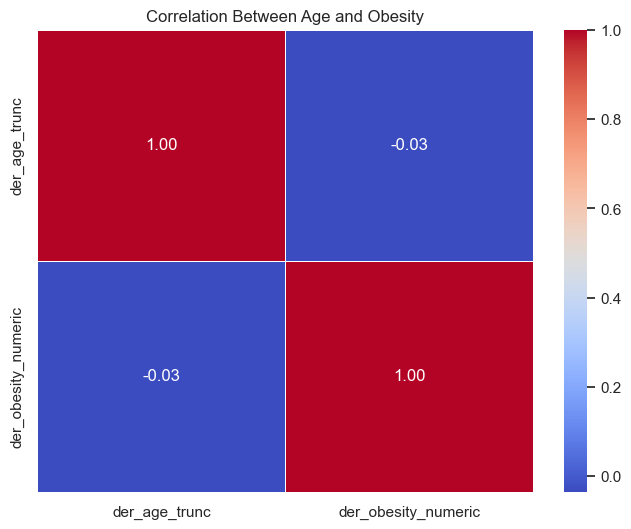

In [25]:
# Convert 'Yes' to 1 and 'No' to 0 in the 'der_obesity' column
rawdata_df['der_obesity_numeric'] = rawdata_df['der_obesity'].map({'Yes': 1, 'No': 0})

# Select relevant columns
selected_columns = ['der_age_trunc', 'der_obesity_numeric']

# Create a new DataFrame with only the selected columns
age_obesity_df = rawdata_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = age_obesity_df.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Age and Obesity')
plt.show()

###  Analysis the realtionship between obesity and age have an affect on Covid with Breast Cancer.

Key Finding: - Age and COVID-19 Severity For People With Brest Cancer:

Our analysis revealed a noteworthy correlation between age and COVID-19 severity in breast cancer patients. Notably, individuals aged 49 to 68 tended to experience milder COVID-19 symptoms, while those in the age range of 58 to 79 exhibited more moderate symptoms. Severe cases were more prevalent in individuals aged 57 to 79. This insight emphasizes the importance of considering age as a factor in predicting COVID-19 outcomes among breast cancer patients.

In our analysis, we observed a discernible connection between a patient's age and the severity of their COVID-19 symptoms. This correlation suggests that as age increases, the likelihood of experiencing more severe symptoms also tends to rise. Specifically, breast cancer patients in the age range of 57 to 79 exhibited a higher prevalence of severe COVID-19 symptoms. This finding aligns with existing medical knowledge, as age is often recognized as a significant factor influencing the severity of respiratory illnesses, including COVID-19.

Understanding the Impact of Obesity on COVID-19 Severity in Breast Cancer Patients:

The analysis revealed a significant proportion of breast cancer patients tend to exhibit mild symptoms when infected with COVID-19. This insight may indicate that factors beyond obesity play a crucial role in determining the severity of symptoms.

Additionally

I checked into the correlation between age and obesity, which was found to be approximately -0.03. This negative correlation indicates a slight tendency for age and obesity to move in opposite directions among individuals with breast cancer. In simpler terms, as age increases, there is a subtle trend for obesity prevalence to decrease, and vice versa. It's essential to note that this correlation is relatively close to zero, signifying a weak association.

So, if someone is older, it doesn't necessarily mean they'll be obese. There are likely other things at play that have a more significant impact on whether someone with breast cancer is obese. It's like saying age is just one piece of the puzzle, and there's a lot more to consider. In summary, the connection we observed between age and obesity is there, but it's not a big deal. It tells us that age alone isn't the main factor determining whether someone with breast cancer is obese or not. We need to look at other factors to get the full picture and find the best ways to help these individuals.

In conclusion

In summary, our findings highlight the complex interplay between age, obesity, and COVID-19 severity in breast cancer patients. Age emerged as a significant factor in predicting symptom severity, while obesity alone did not solely determine outcomes. The nuanced correlation between age and obesity reinforces the need to consider multiple factors for a comprehensive understanding of how these variables influence COVID-19 outcomes in individuals with breast cancer.